# Time Series Forecasting of Temperatures using SARIMA: An Example from Nanjing

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Preparing the Data

In [2]:
temp = pd.read_csv("nanjing_daily_summary.csv")

In [3]:
temp

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,CHM00058238,"NANJING, CH",1951-01-01,0.00,NaN,NaN,53.0,38.0
1,CHM00058238,"NANJING, CH",1951-01-02,0.01,NaN,42.0,45.0,39.0
2,CHM00058238,"NANJING, CH",1951-01-03,0.00,NaN,44.0,52.0,40.0
3,CHM00058238,"NANJING, CH",1951-01-04,0.00,NaN,44.0,58.0,34.0
4,CHM00058238,"NANJING, CH",1951-01-05,0.00,NaN,49.0,62.0,40.0
...,...,...,...,...,...,...,...,...
26341,CHM00058238,"NANJING, CH",2023-02-16,0.01,NaN,45.0,50.0,33.0
26342,CHM00058238,"NANJING, CH",2023-02-17,0.00,NaN,49.0,NaN,35.0
26343,CHM00058238,"NANJING, CH",2023-02-18,0.00,NaN,50.0,NaN,NaN
26344,CHM00058238,"NANJING, CH",2023-02-19,0.00,NaN,42.0,56.0,NaN


In [4]:
temp['DATE'] = pd.to_datetime(temp['DATE'])

In [5]:
temp.set_index('DATE', inplace=True)

In [6]:
temp

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1951-01-01,CHM00058238,"NANJING, CH",0.00,NaN,NaN,53.0,38.0
1951-01-02,CHM00058238,"NANJING, CH",0.01,NaN,42.0,45.0,39.0
1951-01-03,CHM00058238,"NANJING, CH",0.00,NaN,44.0,52.0,40.0
1951-01-04,CHM00058238,"NANJING, CH",0.00,NaN,44.0,58.0,34.0
1951-01-05,CHM00058238,"NANJING, CH",0.00,NaN,49.0,62.0,40.0
...,...,...,...,...,...,...,...
2023-02-16,CHM00058238,"NANJING, CH",0.01,NaN,45.0,50.0,33.0
2023-02-17,CHM00058238,"NANJING, CH",0.00,NaN,49.0,NaN,35.0
2023-02-18,CHM00058238,"NANJING, CH",0.00,NaN,50.0,NaN,NaN


In [7]:
# remove all the unnecessary columns
temp.drop(["STATION","NAME","PRCP","SNWD", "TMAX", "TMIN"], axis=1, inplace=True)

In [8]:
temp

,TAVG
DATE,
1951-01-01,NaN
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [9]:
# check percentage of missing values
temp.apply(pd.isnull).sum()/temp.shape[0]

TAVG    0.000038
dtype: float64

In [10]:
# check missing values for TAVG
temp[pd.isnull(temp["TAVG"])]
temp

,TAVG
DATE,
1951-01-01,NaN
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [11]:
# only first row missing, can remove
temp = temp.drop("1951-01-01")

In [12]:
temp

,TAVG
DATE,
1951-01-02,42.0
1951-01-03,44.0
1951-01-04,44.0
1951-01-05,49.0
1951-01-06,46.0
...,...
2023-02-16,45.0
2023-02-17,49.0
2023-02-18,50.0


In [13]:
# Converting daily TAVG to monthly mean TAVG
temp = temp.resample('M').mean()

In [14]:
temp

,TAVG
DATE,
1951-01-31,36.066667
1951-02-28,38.678571
1951-03-31,45.580645
1951-04-30,54.900000
1951-05-31,69.258065
...,...
2022-10-31,62.838710
2022-11-30,57.000000
2022-12-31,38.741935


In [15]:
# convert TAVG from farenheit to celsius
temp['TAVG'] = (temp['TAVG'] - 32) * 5/9

In [16]:
temp

,TAVG
DATE,
1951-01-31,2.259259
1951-02-28,3.710317
1951-03-31,7.544803
1951-04-30,12.722222
1951-05-31,20.698925
...,...
2022-10-31,17.132616
2022-11-30,13.888889
2022-12-31,3.745520


In [17]:
# checking for correct datatypes
temp.dtypes

TAVG    float64
dtype: object

In [18]:
temp.index

DatetimeIndex(['1951-01-31', '1951-02-28', '1951-03-31', '1951-04-30',
               '1951-05-31', '1951-06-30', '1951-07-31', '1951-08-31',
               '1951-09-30', '1951-10-31',
               ...
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28'],
              dtype='datetime64[ns]', name='DATE', length=866, freq='M')

In [19]:
# according to data set documentation:
# "Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received"
# check if there is any 9999 value in the data set
temp.apply(lambda x: (x==9999).sum())

TAVG    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

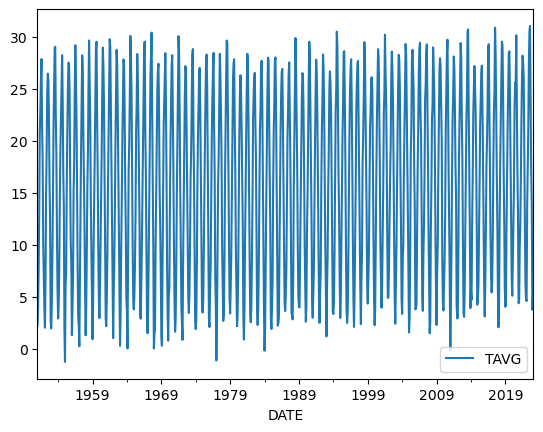

In [20]:
temp.plot()

## ACF and PACF
The ACF and PACF are used to determine if an AR (p) or MA (q) model is appropriated and determine possible candidate models.

ACF measures the correlation between a time series and its lagged values, while PACF measures the correlation between a time series and its lagged values, controlling for the effect of the intervening lags.

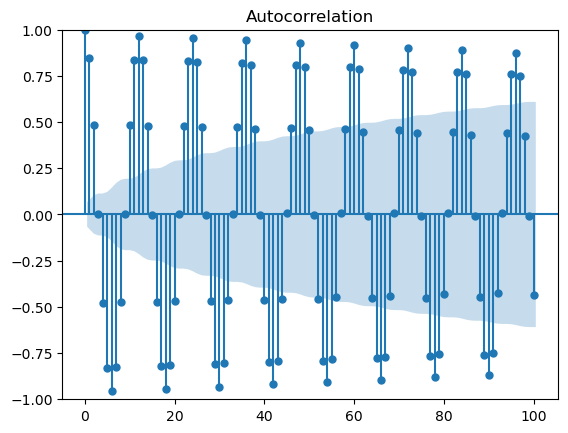

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp, lags=100)
plt.show()

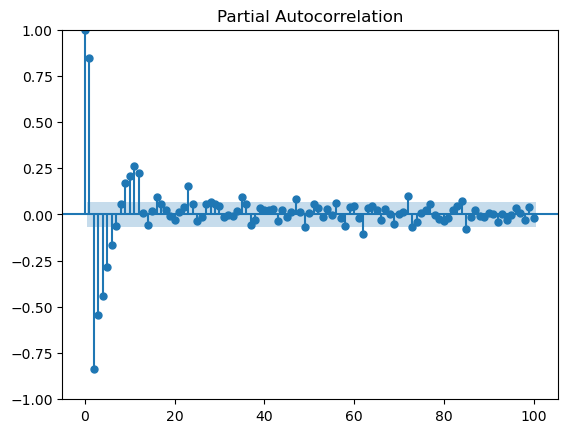

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp, lags=100, method='ywm')
plt.show()

From the ACF and PACF plots we can conclude that _____.

## Grid Search
asdkjashaskjdhakhjaskh

## Splitting the data

In [23]:
# 80:20 train test split
train, test = train_test_split(temp['TAVG'], test_size=0.2, random_state=42, shuffle=False)

In [24]:
train

DATE
1951-01-31     2.259259
1951-02-28     3.710317
1951-03-31     7.544803
1951-04-30    12.722222
1951-05-31    20.698925
                ...    
2008-04-30    15.592593
2008-05-31    22.204301
2008-06-30    23.425926
2008-07-31    28.996416
2008-08-31    26.971326
Freq: M, Name: TAVG, Length: 692, dtype: float64

In [25]:
test

DATE
2008-09-30    24.370370
2008-10-31    19.068100
2008-11-30    11.425926
2008-12-31     5.752688
2009-01-31     2.275986
                ...    
2022-10-31    17.132616
2022-11-30    13.888889
2022-12-31     3.745520
2023-01-31     4.641577
2023-02-28     6.555556
Freq: M, Name: TAVG, Length: 174, dtype: float64

in the study, the researchers utilised a 95:5 train test split, which is typically advised against

## Using auto_arima to determine parameters

In [26]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# use auto_arima to determine SARIMA parameters
sarima_model = pm.auto_arima(train, seasonal=True, m=12, 
                             stepwise=True, suppress_warnings=True,
                             error_action="ignore", max_order=None,
                             trace=True)

# print out the selected model parameters
print(sarima_model.order)
print(sarima_model.seasonal_order)

# create and fit SARIMA model using the selected parameters
model = SARIMAX(train, order=sarima_model.order, seasonal_order=sarima_model.seasonal_order)
results = model.fit()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2811.528, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5013.133, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3829.588, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5964.798, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2753.511, Time=3.89 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2606.427, Time=3.97 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : AIC=2538.669, Time=4.10 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=2736.893, Time=1.55 sec
 ARIMA(3,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=4.99 sec
 ARIMA(3,0,2)(1,0,1)[12] intercept   : AIC=2383.4

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/jason/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  2.21984D+00    |proj g|=  1.45690D-01

At iterate   15    f=  1.93779D+00    |proj g|=  1.71466D-01

At iterate   20    f=  1.75347D+00    |proj g|=  2.50796D-02

At iterate   25    f=  1.69188D+00    |proj g|=  2.22886D-02

At iterate   30    f=  1.68733D+00    |proj g|=  3.06535D-02

At iterate   35    f=  1.68546D+00    |proj g|=  1.98918D-02

At iterate   40    f=  1.67870D+00    |proj g|=  1.77523D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     71      1     0     0   1.369D-02   1.679D+00
  F =   1.6786971283472949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

### Results from auto_arima

In [27]:
# forecast test data
pred = results.forecast(steps=len(test))

## Plotting predicted values against real values

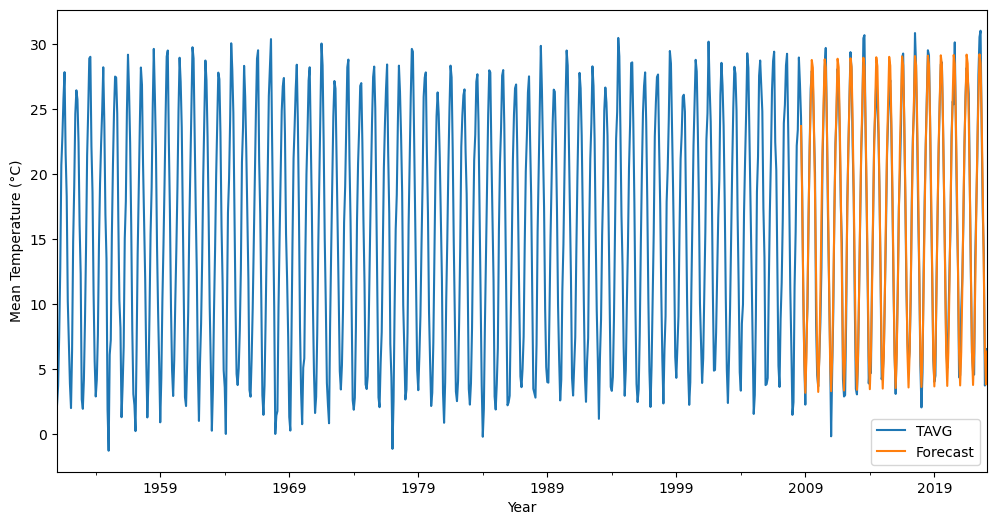

In [28]:
ax = temp.plot(label='Observed', figsize=(12,6))
pred.plot(ax=ax, label='Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Mean Temperature (°C)')
ax.legend()

Text(0, 0.5, 'Temperature')

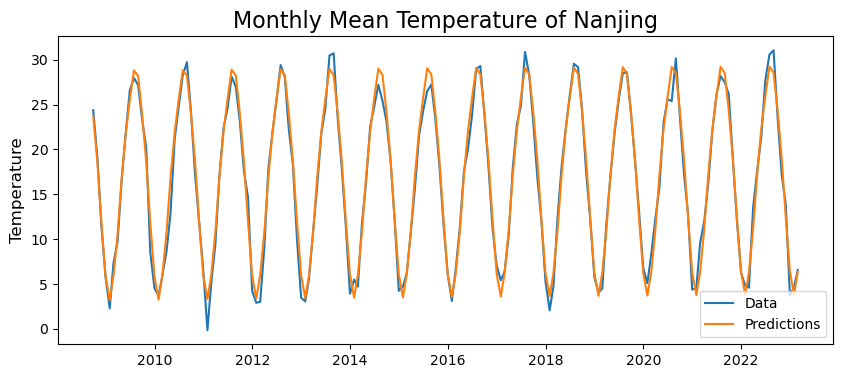

In [29]:
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.title('Monthly Mean Temperature of Nanjing', fontsize=16)
plt.ylabel('Temperature', fontsize=12)
# for year in range(start_date.year,end_date.year):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## Calculating MAPE

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test, pred)
print("MAPE: ", mape)

MAPE:  0.22821070408741911


## Calculating MSE

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, pred)
print("MSE: ", mse)

MSE:  1.6940974007783325
